# Face Detect Classes

In [1]:
%load_ext autoreload
%autoreload 2

# put system imports here
import os
import sys
from os.path import join
from glob import glob
from pathlib import Path
import random

# put pip/conda installed imports here
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt

# put local imports here
fp_app_root = join(Path(os.getcwd()).parent)
sys.path.append(fp_app_root)
from app.settings import app_cfg
from app.utils import file_utils, draw_utils, im_utils, detect_utils
from app.models.bbox import BBoxNorm

## Load image

In [3]:
filepaths = glob(join(app_cfg.DIR_IMAGES, '*.jpg'))
fp_im = filepaths[random.randint(0, len(filepaths)-1)]
im_bgr = cv.imread(fp_im)

In [4]:
detector_dlib = detect_utils.FaceDetectorDLIB()
detector_haar = detect_utils.FaceDetectorHAAR()

In [5]:
bboxes_dlib = detector_dlib.detect(im_bgr)
bboxes_haar = detector_haar.detect(im_bgr)

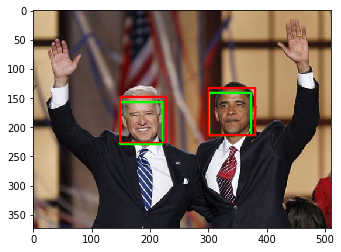

In [7]:
# Draw faces
im_dst = im_bgr.copy()

# dlib
for bbox in bboxes_dlib:
  im_dst = draw_utils.draw_bbox_cv(im_dst, bbox, color=(0,255,0), stroke_weight=2)
  
# haar
for bbox in bboxes_haar:
  im_dst = draw_utils.draw_bbox_cv(im_dst, bbox, color=(0,0,255), stroke_weight=2)

# now use shortcut from im_utils
plt.imshow(im_utils.bgr2rgb(im_dst))